In [1]:
from ExtractTable import ExtractTable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('extraction_api_key.txt', 'r') as file:
    api_key = file.read()
    
et_sess = ExtractTable(api_key)

# et_sess.__dict__
usage = et_sess.check_usage()
print(usage)

{'credits': 50, 'queued': 0, 'used': 46}


In [2]:
data_dir = "Provo Air Quality Data"

# et_sess.process_file(filepath=data_dir+"/NO2-2014.png", output_format="df")

In [102]:
et_sess.save_output(data_dir, output_format="csv")

'Provo Air Quality Data'

In [104]:
usage = et_sess.check_usage()
print(usage)

{'credits': 10, 'queued': 0, 'used': 1}


In [141]:
from PIL import Image, ImageEnhance
import pytesseract
import re

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]
months = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
#metrics = ["PM10"]

image_paths = [
    f"{data_dir}/{metric}-{year}.png"
    for year in range(2014, 2022 + 1)
    for metric in metrics
]

for path in image_paths:
    print(path)
    et_sess.process_file(path, output_format="df")
    et_sess.save_output(data_dir, output_format="csv")

Provo Air Quality Data/PM10-2014.png
Provo Air Quality Data/PM10-2015.png
Provo Air Quality Data/PM10-2016.png


In [149]:
image = Image.open("Provo Air Quality Data/O3-2014.png")

enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(2.0)  # Increase the contrast (adjust the factor as needed)

# Enhance image sharpness
enhancer = ImageEnhance.Sharpness(image)
image = enhancer.enhance(2.0)

custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJLMPNORSTUVY.'
text = pytesseract.image_to_string(image, config=custom_config)
text

'D JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOEMBER DECEMBER\n1 029 035 045 .049 043 061 065 020 053 .038 042 .025\n2 020 038 045 045 056 067 .060 054 050 .040 037 .013\n3 018 033 045 .050 052 .063 049 046 045 .040 .030 .022\n4 035 034 028 048 058 066 .050 044 043 046 030 014\n5 037 026 1036 047 2055 1066 .055 1042 039 .043 031 .018\n6 022 032 .040 043 054 .055 .067 .053 041 038 .028 021\n7 007 040 039 049 058 064 .073 049 045 .038 013 .022\n8 003 039 044 044 048 046 074 .055 035 .036 036 016\n9 021 032 046 047 046 058 054 060 024 043 036 019\n10 2021 2025 .044 .055 052 .056 052 .060 045 .049 042 .O1L\n11 036 030 .038 .053 049 .060 .051 053 043 .040 027 .010\n12 038 021 042 .050 047 .063 067 .042 038 .037 024 045\n13 025 022 045 .043 051 065 065 .039 043 036 022 .043\n14 .024 .009 2045 050 2053 .041 .060 .049 .047 .016 026 .031\n15 020 005 050 050 054 .051 056 050 048 042 024\n16 018 037 049 .058 054 .043 059 056 044 .009 035 .017\n17 016 022 046 .054 054 .03

In [134]:
pattern = "|".join(months)
data = re.split(pattern, text)
data[9].split("\n+")

['\n\n053\n050\n045\n043',
 '039\n041\n045\n035\n024',
 '045\n043\n038\n043\n047',
 '048\n044\n042\n035\n\n047',
 '043\n044\n034\n029\n044',
 '048\n038\n\n']

In [161]:
text.split("\n")

['D JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOEMBER DECEMBER',
 '1 029 035 045 .049 043 061 065 020 053 .038 042 .025',
 '2 020 038 045 045 056 067 .060 054 050 .040 037 .013',
 '3 018 033 045 .050 052 .063 049 046 045 .040 .030 .022',
 '4 035 034 028 048 058 066 .050 044 043 046 030 014',
 '5 037 026 1036 047 2055 1066 .055 1042 039 .043 031 .018',
 '6 022 032 .040 043 054 .055 .067 .053 041 038 .028 021',
 '7 007 040 039 049 058 064 .073 049 045 .038 013 .022',
 '8 003 039 044 044 048 046 074 .055 035 .036 036 016',
 '9 021 032 046 047 046 058 054 060 024 043 036 019',
 '10 2021 2025 .044 .055 052 .056 052 .060 045 .049 042 .O1L',
 '11 036 030 .038 .053 049 .060 .051 053 043 .040 027 .010',
 '12 038 021 042 .050 047 .063 067 .042 038 .037 024 045',
 '13 025 022 045 .043 051 065 065 .039 043 036 022 .043',
 '14 .024 .009 2045 050 2053 .041 .060 .049 .047 .016 026 .031',
 '15 020 005 050 050 054 .051 056 050 048 042 024',
 '16 018 037 049 .058 054 .043 059 0

In [4]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

tables = [
    f"{data_dir}/{metric}-{year}_table_1.csv"
    for year in range(2014, 2022 + 1)
    for metric in metrics
]

ProvoAQ = pd.DataFrame()

for table in tables:
    data = pd.read_csv(table, header=0, names=[col.upper() for col in pd.read_csv(table, nrows=1).columns])
    data["DAY"] = list(range(1, data.shape[0] + 1))
    
    pivoted = pd.melt(data, id_vars=['DAY'], var_name='MONTH', value_name='DATA')
    pivoted["YEAR"] = int(table.split("_table")[0][-4:])
    pivoted["METRIC"] = table.split("/")[-1].split("-")[0]
    
    if ProvoAQ.empty:
        ProvoAQ = pivoted.copy()
    else:
        ProvoAQ = pd.concat([ProvoAQ, pivoted.copy()]).reset_index(drop=True)

In [5]:
ProvoAQ

,DAY,MONTH,DATA,YEAR,METRIC
0,1,JANUARY,1.6,2014,CO
1,2,JANUARY,1.8,2014,CO
2,3,JANUARY,1.8,2014,CO
3,4,JANUARY,1.9,2014,CO
4,5,JANUARY,1.3,2014,CO
...,...,...,...,...,...
16459,27,DECEMBER,2.1,2022,PM25
16460,28,DECEMBER,1.1,2022,PM25
16461,29,DECEMBER,1.9,2022,PM25
16462,30,DECEMBER,1.3,2022,PM25


In [6]:
def is_valid_date(d):
    try:
        pd.Timestamp(d)
        return True
    except ValueError:
        return False
    
valid_dates_mask = ProvoAQ.apply(lambda row: is_valid_date(f"{row['YEAR']}-{row['MONTH']}-{row['DAY']}"), axis=1)

ProvoAQ = ProvoAQ[valid_dates_mask].copy()

ProvoAQ['DATE'] = pd.to_datetime(ProvoAQ[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))

ProvoAQ.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)

In [7]:
ProvoAQ = ProvoAQ.pivot(index=['DATE'], columns='METRIC', values='DATA').reset_index().copy()
ProvoAQ.to_csv("ProvoAQ.csv", index=False)
ProvoAQ

METRIC,DATE,CO,NO2,O3,PM10,PM25
0,2014-01-01,1.6,54.0,0.029,41.0,P 37.3
1,2014-01-02,1.8,52.0,0.02,19.0,25.0
2,2014-01-03,1.8,48.0,0.018,47.0,22.9
3,2014-01-04,1.9,46.0,0.035,28.0,13.3
4,2014-01-05,1.3,53.0,0.037,32.0,10.3
...,...,...,...,...,...,...
3282,2022-12-27,0.6,29.8,0.033,3.0,2.1
3283,2022-12-28,300.0,26.1,0.029,3.0,1.1
3284,2022-12-29,0.3,26.9,0.032,6.0,1.9
3285,2022-12-30,0.4,14.2,0.038,2.0,1.3


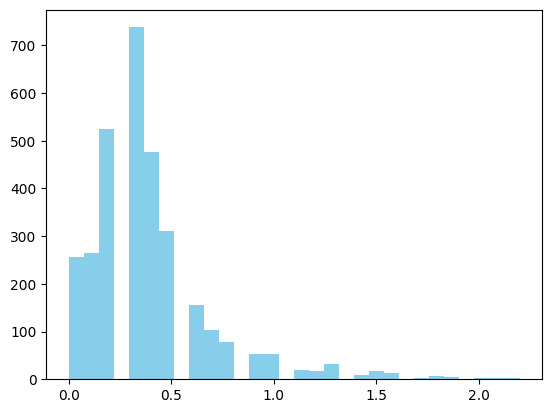

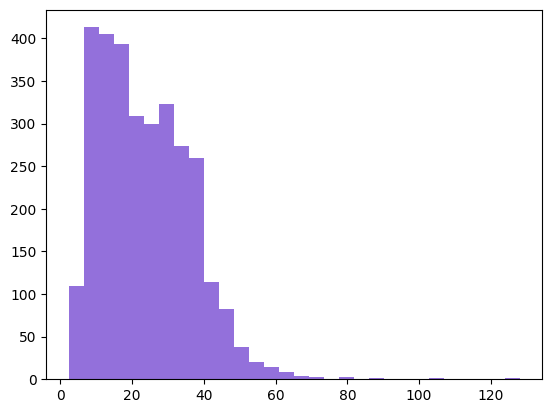

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


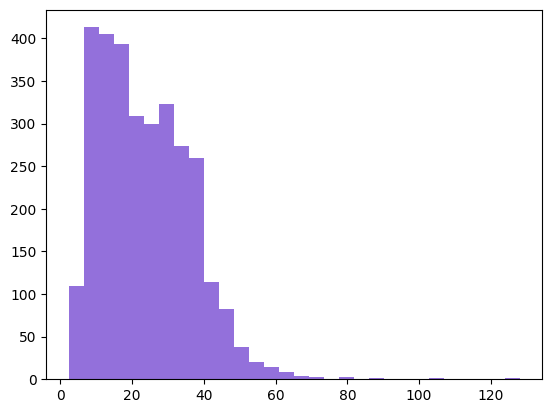

In [8]:
plt.hist(ProvoAQ['NO2'], bins=30, color='mediumpurple')

plt.show()